In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [3]:
print(X,y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [4]:
geography = pd.get_dummies(X["Geography"],drop_first = True)
gender = pd.get_dummies(X["Gender"],drop_first = True)

In [5]:
X = pd.concat([X,geography,gender],axis = 1)
X= X.drop(['Geography','Gender'],axis =1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU ,ELU
from keras.layers import Dropout

In [24]:
classifier = Sequential()
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = classifier.fit(X_train, y_train,validation_split=0.33,batch_size=10, epochs=100)  

Epoch 1/100


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3578 - loss: 1.2913 - val_accuracy: 0.5358 - val_loss: 0.7709
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6052 - loss: 0.6893 - val_accuracy: 0.7463 - val_loss: 0.5626
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7675 - loss: 0.5373 - val_accuracy: 0.7906 - val_loss: 0.5071
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7914 - loss: 0.4920 - val_accuracy: 0.7936 - val_loss: 0.4863
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7999 - loss: 0.4677 - val_accuracy: 0.7978 - val_loss: 0.4726
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8015 - loss: 0.4589 - val_accuracy: 0.8012 - val_loss: 0.4634
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8050 - loss: 0.4481 - val_accuracy: 0.8054 - val_loss: 0.4559
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8107 - loss: 0.4367 - val_accuracy: 0.8054

In [26]:
print(model_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


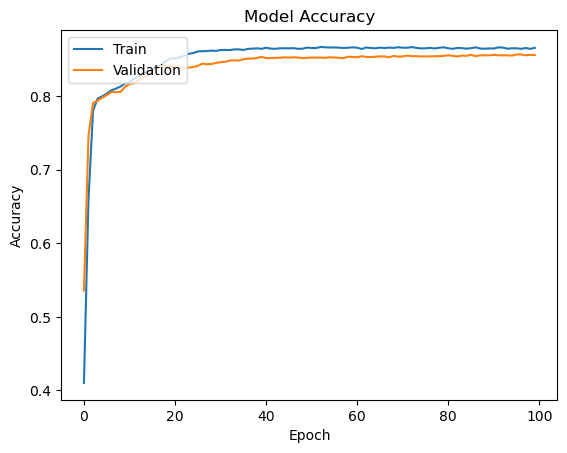

In [28]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

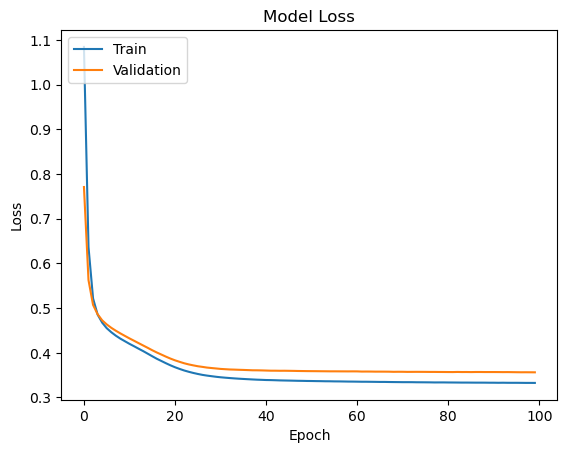

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1527   68]
 [ 204  201]]


In [36]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.864
